In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

from numpy import linalg

from sklearn.datasets import load_boston

data, targets = load_boston(return_X_y=True)
targets = np.array(targets)
print(data.shape, targets.shape)

(506, 13) (506,)


In [2]:
# Cross validation setup
indices = np.arange(len(targets))
np.random.shuffle(indices)
splits = np.array_split(indices, 5)

In [3]:
# Least squares regression

error = 0
for i in range(5):
    test_data = data[splits[i],:]
    test_targets = targets[splits[i]]
    
    train_data = np.delete(data, splits[i], axis=0)
    train_targets = np.delete(targets, splits[i])
    
    A = np.hstack((train_data, np.ones(train_data.shape[0])[:,np.newaxis]))
    pinv = np.linalg.inv(A.T @ A) @ A.T
    coeffs = pinv @ train_targets
    
    test_A = np.hstack((test_data, np.ones(test_data.shape[0])[:,np.newaxis]))
    test_pred = test_A @ coeffs
    fold_err = np.average(np.abs(test_pred - test_targets))
    error += fold_err

error /= 5
print('Average prediction error:', error)

Average prediction error: 3.3588043839


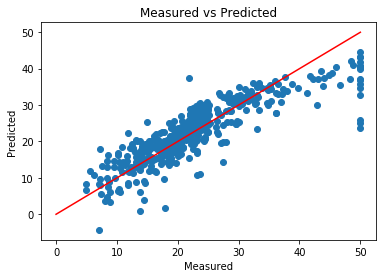

In [4]:
A = np.hstack((data, np.ones(data.shape[0])[:,np.newaxis]))
pinv = np.linalg.inv(A.T @ A) @ A.T
coeffs = pinv @ targets
predictions = A @ coeffs 

plt.scatter(targets, predictions)
plt.plot((0,50), (0,50), 'r')
plt.title('Measured vs Predicted')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [5]:
# Ridge regression
lambdas = [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 100, 1000]
lambda_errors = []

final_test_data = data[splits[4]]
final_test_targets = targets[splits[4]]

for l in lambdas:
    error = 0
    for i in range(4):
        test_data = data[splits[i],:]
        test_targets = targets[splits[i]]

        train_data = np.delete(data, np.concatenate((splits[i], splits[4])), axis=0)
        train_targets = np.delete(targets, np.concatenate((splits[i], splits[4])))

        A = np.hstack((train_data, np.ones(train_data.shape[0])[:,np.newaxis]))
        pinv = np.linalg.inv(A.T @ A + l*np.eye(A.shape[1])) @ A.T
        coeffs = pinv @ train_targets

        test_A = np.hstack((test_data, np.ones(test_data.shape[0])[:,np.newaxis]))
        test_pred = test_A @ coeffs
        fold_err = np.average(np.abs(test_pred - test_targets))
        error += fold_err
    error /= 4
    lambda_errors.append(error)

# print(lambda_errors)

min_error = min(lambda_errors)
min_index = lambda_errors.index(min_error)
lambda_start = min_error
lambda_end = min_error
if min_index != 0:
    lambda_start = lambdas[min_index - 1]
if min_index != len(lambdas) - 1:
    lambda_end = lambdas[min_index + 1]

lambdas = np.arange(lambda_start, lambda_end, 0.01)
lambda_errors = []
for l in lambdas:
    error = 0
    for i in range(4):
        test_data = data[splits[i],:]
        test_targets = targets[splits[i]]

        train_data = np.delete(data, np.concatenate((splits[i], splits[4])), axis=0)
        train_targets = np.delete(targets, np.concatenate((splits[i], splits[4])))

        A = np.hstack((train_data, np.ones(train_data.shape[0])[:,np.newaxis]))
        pinv = np.linalg.inv(A.T @ A + l*np.eye(A.shape[1])) @ A.T
        coeffs = pinv @ train_targets

        test_A = np.hstack((test_data, np.ones(test_data.shape[0])[:,np.newaxis]))
        test_pred = test_A @ coeffs
        fold_err = np.average(np.abs(test_pred - test_targets))
        error += fold_err
    error /= 4
    lambda_errors.append(error)

# print(lambda_errors)
min_error = min(lambda_errors)
min_index = lambda_errors.index(min_error)
final_lambda = lambdas[min_index]
print('Optimal lambda:', final_lambda)


final_test_A = np.hstack((final_test_data, np.ones(final_test_data.shape[0])[:,np.newaxis]))
pinv = np.linalg.inv(final_test_A.T @ final_test_A + final_lambda*np.eye(final_test_A.shape[1])) @ final_test_A.T
coeffs = pinv @ final_test_targets
final_test_pred = final_test_A @ coeffs
final_test_error = np.average(np.abs(final_test_pred - final_test_targets))
print('Final test error:', final_test_error)

Optimal lambda: 0.23
Final test error: 3.17364015006
